# Multiple Linear Regression - Housing.csv (Simple Version)

In [1]:
# Step 1: Import libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Step 2: Shape and data types
print('Shape:', df.shape)
print('\nData Types:\n', df.dtypes)

Shape: (545, 13)

Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [3]:
# Step 3: Check and fill missing values
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
# Step 4: Prepare X and y
X = df.drop('price', axis=1)
y = df['price']

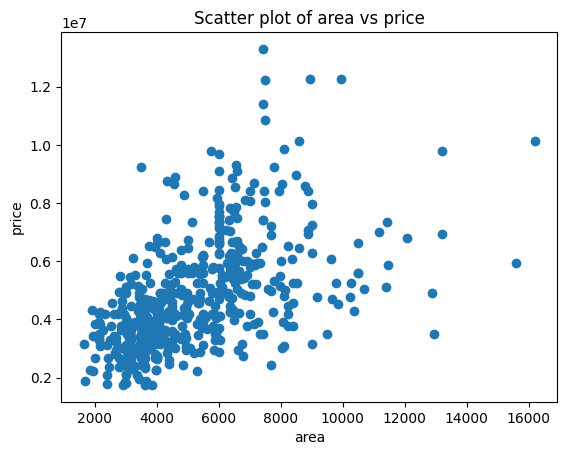

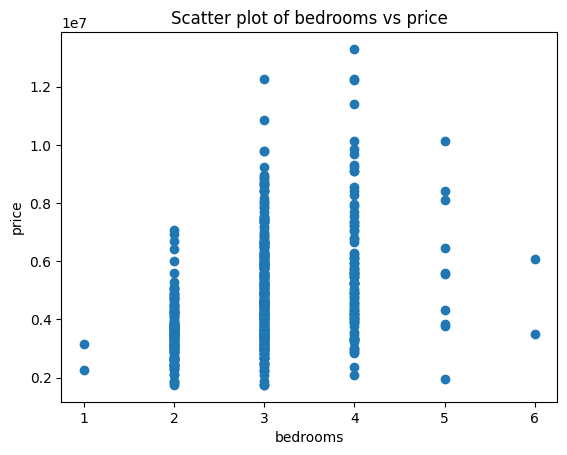

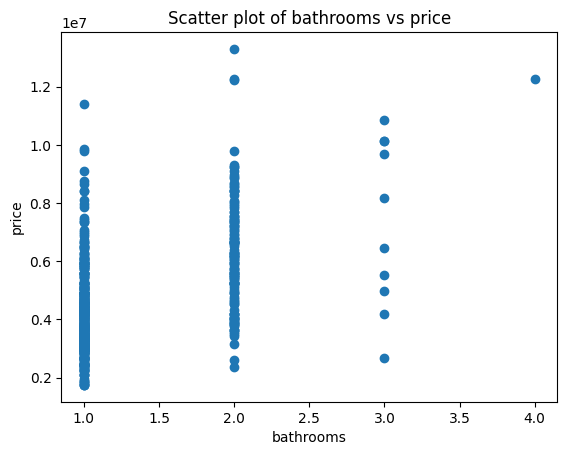

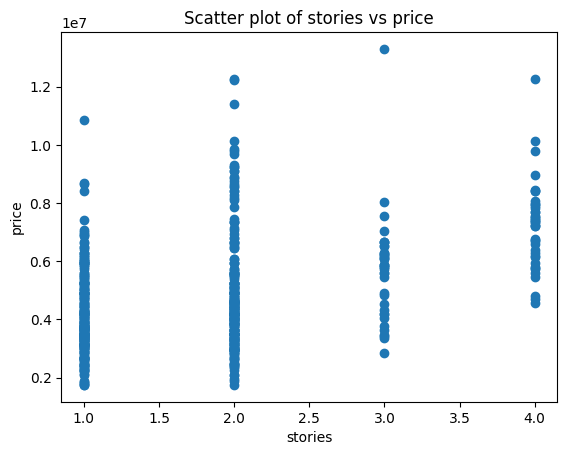

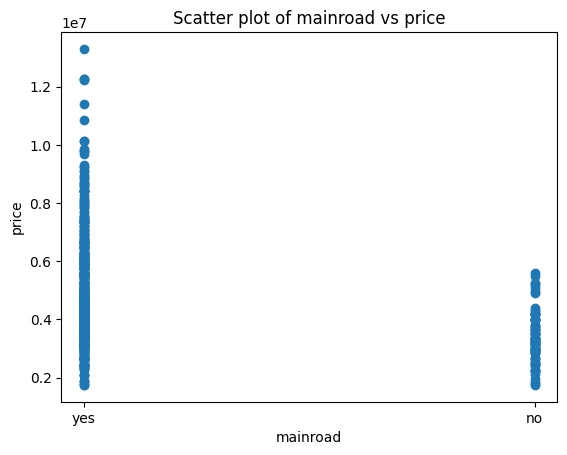

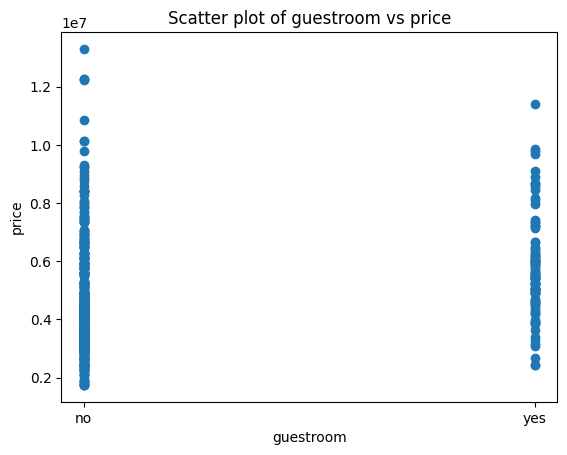

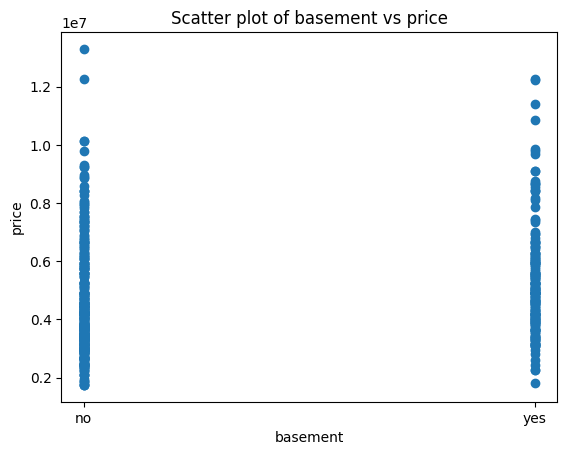

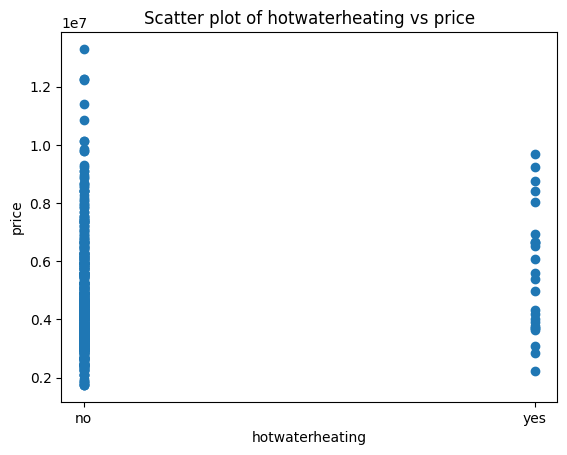

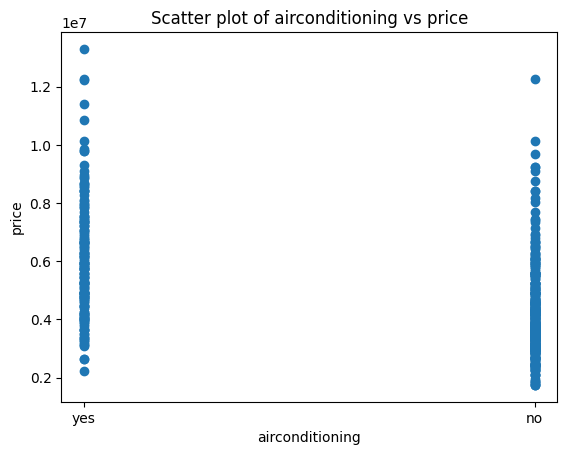

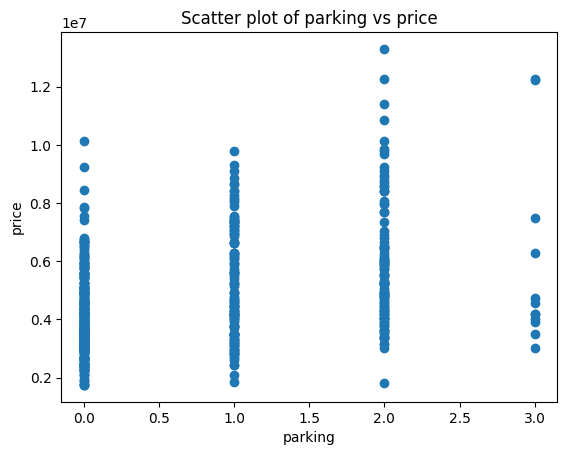

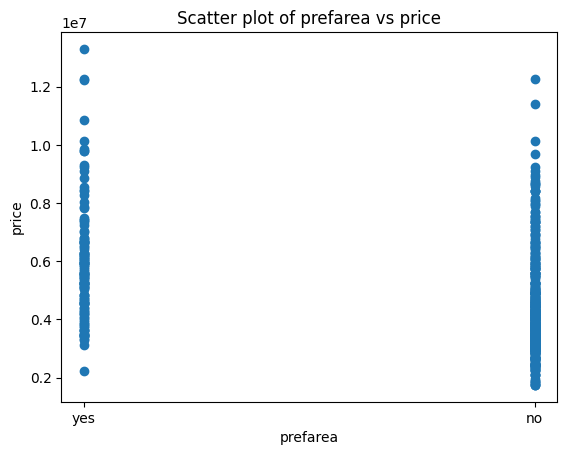

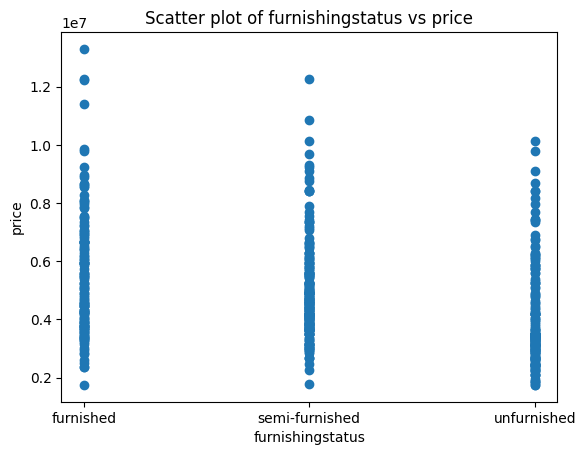

In [5]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
for col in X.columns:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Scatter plot of {col} vs price')
    plt.show()

In [6]:
# Step 5: Encode categorical and scale numerical
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [8]:
# Step 7: Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

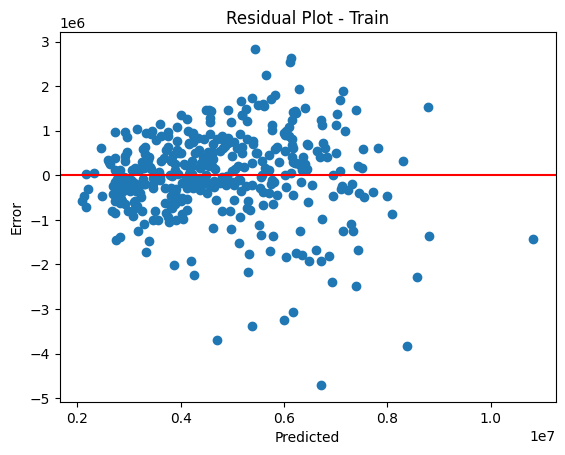

In [9]:
# Step 8: Predict and errors
y_pred_train = model.predict(X_train)
error_train = y_pred_train - y_train

plt.scatter(y_pred_train, error_train)
plt.axhline(0, color='red')
plt.title('Residual Plot - Train')
plt.xlabel('Predicted')
plt.ylabel('Error')
plt.show()

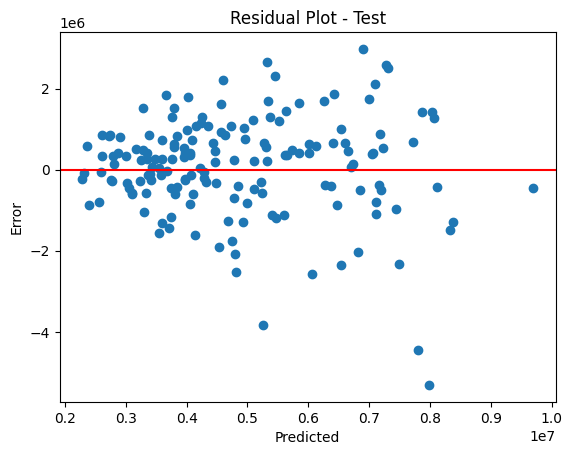

In [10]:
# Step 9: Test predictions and plot
y_pred_test = model.predict(X_test)
error_test = y_pred_test - y_test

plt.scatter(y_pred_test, error_test)
plt.axhline(0, color='red')
plt.title('Residual Plot - Test')
plt.xlabel('Predicted')
plt.ylabel('Error')
plt.show()

In [11]:
# Step 10: MSE and R2
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print('MSE:', mse)
print('R2:', r2)

MSE: 1523019469501.2913
R2: 0.6463350878895877


In [12]:
# Step 11: Adjusted R2 (using 5 features only)
X_reduced = X.iloc[:, :5]
X_reduced_scaled = scaler.fit_transform(X_reduced)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced_scaled, y, test_size=0.3, random_state=42)

model_r = LinearRegression()
model_r.fit(X_train_r, y_train_r)
y_pred_r = model_r.predict(X_test_r)

r2_r = r2_score(y_test_r, y_pred_r)
n = X_test_r.shape[0]
k = X_test_r.shape[1]
adj_r2 = 1 - (1 - r2_r) * (n - 1) / (n - k - 1)
print('Adjusted R2:', adj_r2)

Adjusted R2: 0.5102967238087244
